# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

print("✓ Libraries imported")

✓ Libraries imported


# Configuration

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Paths
OUTPUT_DIR = 'report_figures'
CSV_PATH = 'logs/slr_improved_training_log.csv'

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"✓ Output directory: {OUTPUT_DIR}/")
print(f"✓ Looking for data at: {CSV_PATH}")

✓ Output directory: report_figures/
✓ Looking for data at: logs/slr_improved_training_log.csv


# Load Training Data

In [4]:
try:
    df = pd.read_csv(CSV_PATH)
    print(f"✓ Loaded {len(df)} epochs")
    print(f"✓ Columns: {list(df.columns)}")
    print(f"\nFirst 3 rows:")
    print(df.head(3))
except FileNotFoundError:
    print(f"✗ CSV not found at: {CSV_PATH}")
    print("Please update CSV_PATH variable")
    raise

✓ Loaded 99 epochs
✓ Columns: ['epoch', 'accuracy', 'auc', 'loss', 'lr', 'pr_auc', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_pr_auc', 'val_precision', 'val_recall']

First 3 rows:
   epoch  accuracy       auc      loss      lr    pr_auc  precision    recall  \
0      0  0.526733  0.539179  1.904896  0.0001  0.534463   0.527439  0.513861   
1      1  0.545049  0.567115  1.848827  0.0001  0.547457   0.545274  0.542574   
2      2  0.559901  0.589824  1.805690  0.0001  0.563309   0.559606  0.562376   

   val_accuracy   val_auc  val_loss  val_pr_auc  val_precision  val_recall  
0      0.528908  0.578858  1.738681    0.577500       0.545455    0.334764  
1      0.599572  0.652012  1.689109    0.607231       0.615000    0.527897  
2      0.625268  0.670491  1.652265    0.609554       0.623932    0.626609  


# Figure 1: Accuracy

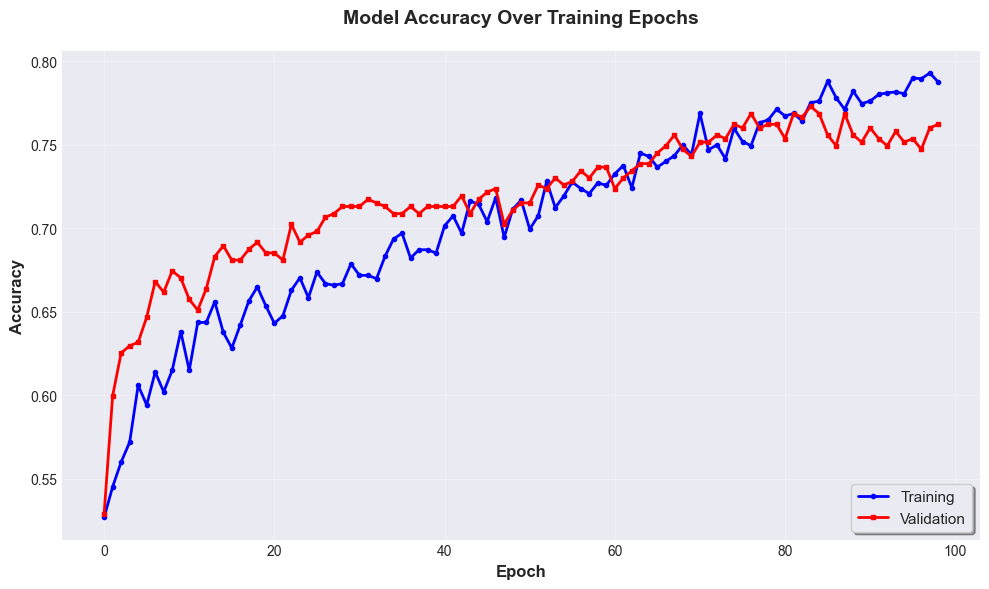

✓ Saved: report_figures\fig1_accuracy.png


In [5]:
def plot_accuracy(df):
    """Training and validation accuracy over epochs"""
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['accuracy'], 'b-', linewidth=2, 
             label='Training', marker='o', markersize=3)
    plt.plot(df['epoch'], df['val_accuracy'], 'r-', linewidth=2, 
             label='Validation', marker='s', markersize=3)
    
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
    plt.title('Model Accuracy Over Training Epochs', 
              fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    save_path = os.path.join(OUTPUT_DIR, 'fig1_accuracy.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {save_path}")

plot_accuracy(df)


# Figure 2: Loss

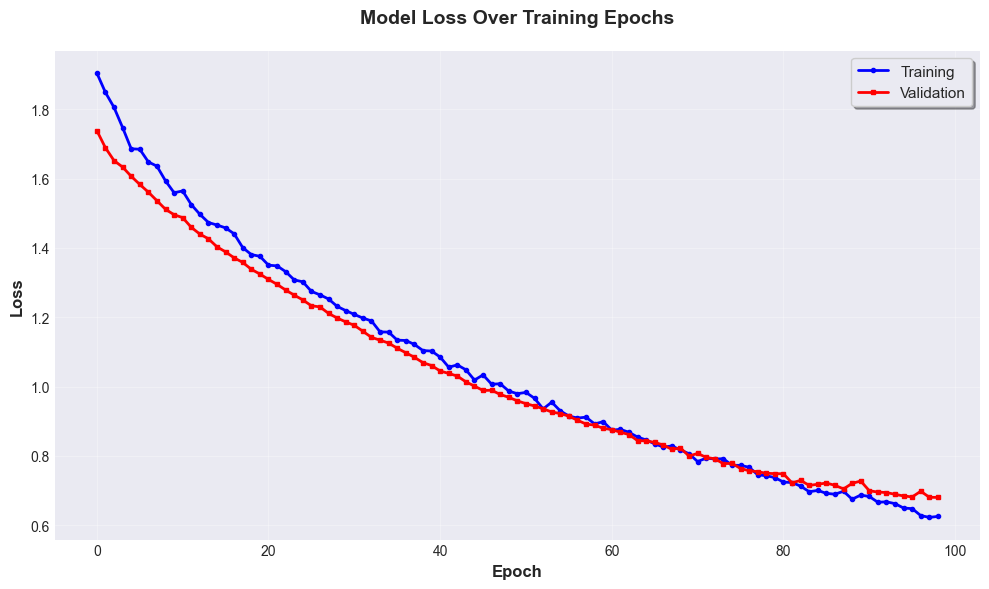

✓ Saved: report_figures\fig2_loss.png


In [6]:
def plot_loss(df):
    """Training and validation loss over epochs"""
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['loss'], 'b-', linewidth=2, 
             label='Training', marker='o', markersize=3)
    plt.plot(df['epoch'], df['val_loss'], 'r-', linewidth=2, 
             label='Validation', marker='s', markersize=3)
    
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Loss', fontsize=12, fontweight='bold')
    plt.title('Model Loss Over Training Epochs', 
              fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='upper right', fontsize=11, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    save_path = os.path.join(OUTPUT_DIR, 'fig2_loss.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {save_path}")

plot_loss(df)


# Figure 3: ROC AUC

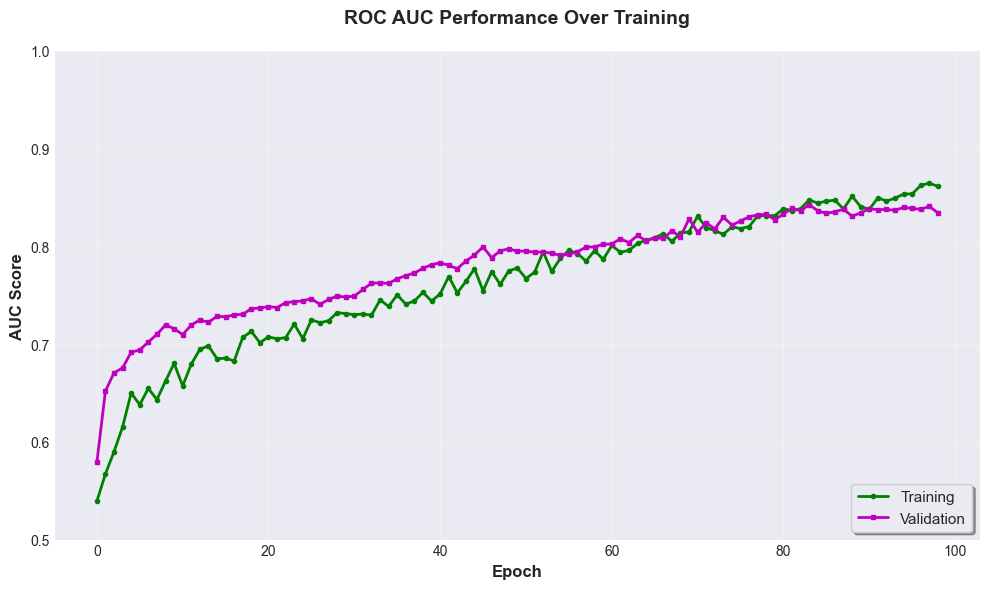

✓ Saved: report_figures\fig3_roc_auc.png


In [7]:
def plot_roc(df):
    """ROC AUC performance over training"""
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['auc'], 'g-', linewidth=2, 
             label='Training', marker='o', markersize=3)
    plt.plot(df['epoch'], df['val_auc'], 'm-', linewidth=2, 
             label='Validation', marker='s', markersize=3)
    
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('AUC Score', fontsize=12, fontweight='bold')
    plt.title('ROC AUC Performance Over Training', 
              fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.ylim([0.5, 1.0])
    plt.tight_layout()
    
    save_path = os.path.join(OUTPUT_DIR, 'fig3_roc_auc.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {save_path}")

plot_roc(df)

# Figure 4: Precision and Recall

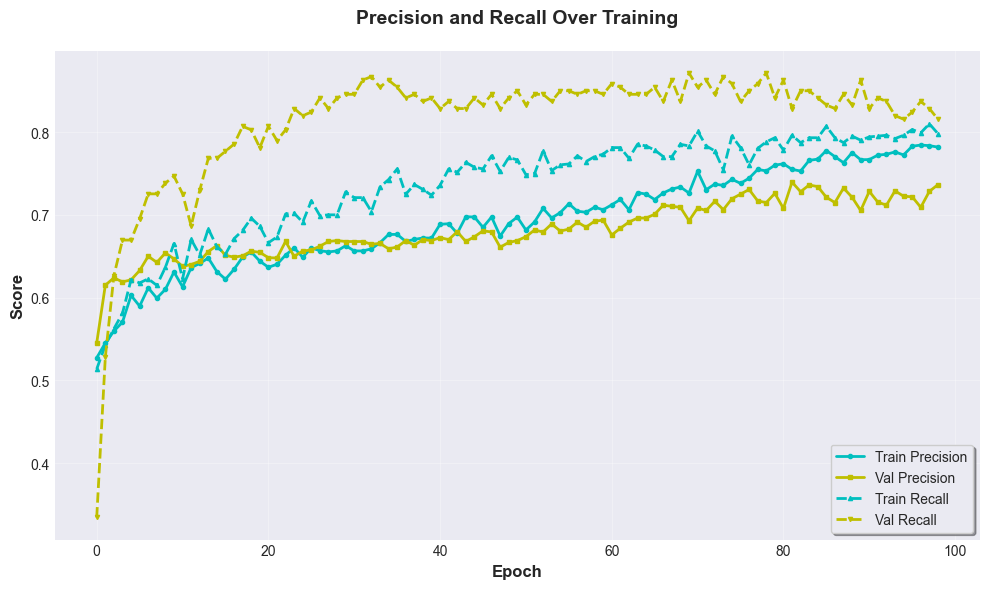

✓ Saved: report_figures\fig4_precision_recall.png


In [8]:
def plot_precision_recall(df):
    """Precision and recall metrics over training"""
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['precision'], 'c-', linewidth=2, 
             label='Train Precision', marker='o', markersize=3)
    plt.plot(df['epoch'], df['val_precision'], 'y-', linewidth=2, 
             label='Val Precision', marker='s', markersize=3)
    plt.plot(df['epoch'], df['recall'], 'c--', linewidth=2, 
             label='Train Recall', marker='^', markersize=3)
    plt.plot(df['epoch'], df['val_recall'], 'y--', linewidth=2, 
             label='Val Recall', marker='v', markersize=3)
    
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Score', fontsize=12, fontweight='bold')
    plt.title('Precision and Recall Over Training', 
              fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=10, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    save_path = os.path.join(OUTPUT_DIR, 'fig4_precision_recall.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {save_path}")

plot_precision_recall(df)

# Figure 5: PR AUC

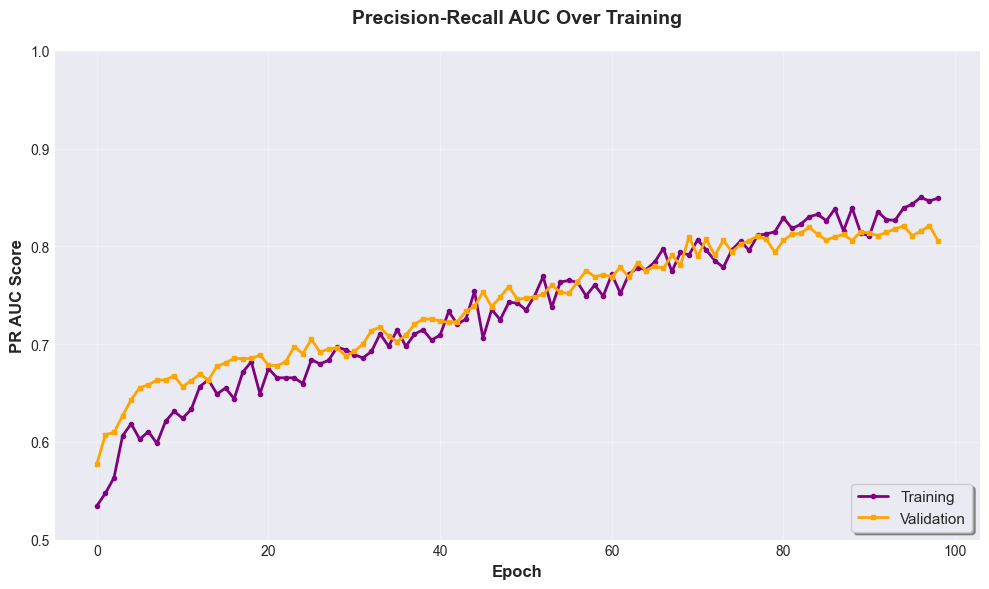

✓ Saved: report_figures\fig5_pr_auc.png


In [9]:
def plot_pr_auc(df):
    """Precision-Recall AUC if available"""
    if 'pr_auc' not in df.columns or 'val_pr_auc' not in df.columns:
        print("⊘ PR AUC columns not found, skipping")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['pr_auc'], 'purple', linewidth=2, 
             label='Training', marker='o', markersize=3)
    plt.plot(df['epoch'], df['val_pr_auc'], 'orange', linewidth=2, 
             label='Validation', marker='s', markersize=3)
    
    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('PR AUC Score', fontsize=12, fontweight='bold')
    plt.title('Precision-Recall AUC Over Training', 
              fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.ylim([0.5, 1.0])
    plt.tight_layout()
    
    save_path = os.path.join(OUTPUT_DIR, 'fig5_pr_auc.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {save_path}")

plot_pr_auc(df)

In [ ]:
def plot_overview(df):
    """2x2 subplot overview of all metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # (a) Accuracy
    axes[0, 0].plot(df['epoch'], df['accuracy'], 'b-', linewidth=2, 
                    label='Train', marker='o', markersize=2)
    axes[0, 0].plot(df['epoch'], df['val_accuracy'], 'r-', linewidth=2, 
                    label='Val', marker='s', markersize=2)
    axes[0, 0].set_xlabel('Epoch', fontweight='bold')
    axes[0, 0].set_ylabel('Accuracy', fontweight='bold')
    axes[0, 0].set_title('(a) Model Accuracy', fontweight='bold')
    axes[0, 0].legend(frameon=True, shadow=True)
    axes[0, 0].grid(True, alpha=0.3)
    
    # (b) Loss
    axes[0, 1].plot(df['epoch'], df['loss'], 'b-', linewidth=2, 
                    label='Train', marker='o', markersize=2)
    axes[0, 1].plot(df['epoch'], df['val_loss'], 'r-', linewidth=2, 
                    label='Val', marker='s', markersize=2)
    axes[0, 1].set_xlabel('Epoch', fontweight='bold')
    axes[0, 1].set_ylabel('Loss', fontweight='bold')
    axes[0, 1].set_title('(b) Model Loss', fontweight='bold')
    axes[0, 1].legend(frameon=True, shadow=True)
    axes[0, 1].grid(True, alpha=0.3)
    
    # (c) ROC AUC
    axes[1, 0].plot(df['epoch'], df['auc'], 'g-', linewidth=2, 
                    label='Train', marker='o', markersize=2)
    axes[1, 0].plot(df['epoch'], df['val_auc'], 'm-', linewidth=2, 
                    label='Val', marker='s', markersize=2)
    axes[1, 0].set_xlabel('Epoch', fontweight='bold')
    axes[1, 0].set_ylabel('AUC', fontweight='bold')
    axes[1, 0].set_title('(c) ROC AUC', fontweight='bold')
    axes[1, 0].legend(frameon=True, shadow=True)
    axes[1, 0].grid(True, alpha=0.3)
    
    # (d) Precision & Recall
    axes[1, 1].plot(df['epoch'], df['val_precision'], 'y-', linewidth=2, 
                    label='Val Precision', marker='s', markersize=2)
    axes[1, 1].plot(df['epoch'], df['val_recall'], 'c-', linewidth=2, 
                    label='Val Recall', marker='^', markersize=2)
    axes[1, 1].set_xlabel('Epoch', fontweight='bold')
    axes[1, 1].set_ylabel('Score', fontweight='bold')
    axes[1, 1].set_title('(d) Precision & Recall', fontweight='bold')
    axes[1, 1].legend(frameon=True, shadow=True)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle('Training Metrics Overview', fontsize=16, 
                 fontweight='bold', y=0.995)
    plt.tight_layout()
    
    save_path = os.path.join(OUTPUT_DIR, 'fig6_overview.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {save_path}")

plot_overview(df)